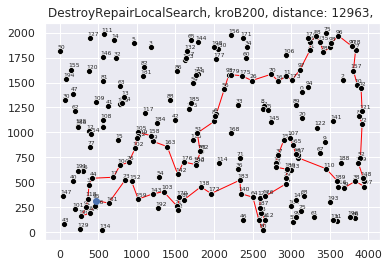

,strategy,instance,cost,time
0,DestroyRepairLocalSearch,kroB200,12966,240.134378
0,DestroyRepairLocalSearch,kroB200,13597,240.001451
0,DestroyRepairLocalSearch,kroB200,13290,240.054005
0,DestroyRepairLocalSearch,kroB200,13309,240.122177
0,DestroyRepairLocalSearch,kroB200,13325,240.302001
0,DestroyRepairLocalSearch,kroB200,13270,240.159180
0,DestroyRepairLocalSearch,kroB200,13011,240.331920
0,DestroyRepairLocalSearch,kroB200,13078,240.002265
0,DestroyRepairLocalSearch,kroB200,13172,240.119054
0,DestroyRepairLocalSearch,kroB200,12963,240.005710


In [19]:
from collections import defaultdict
from itertools import product
from random import seed

import seaborn as sns
import numpy as np
from tqdm import tqdm
from strategies.destroy_repair.destroy_repair import DestroyRepairLocalSearch

from strategies.greedy_cycle.cheapest_insertion import CheapestInsertion
from api.instance import Instance
from strategies.iterated_local_search.iterated_local_search import IteratedLocalSearch
from strategies.local_search.local_search import LocalSearch
from strategies.local_search_candidates_moves.local_search_candidates_moves import LocalSearchWitchCandidatesMoves
from strategies.ls_cache.local_search_with_cache import LocalSearchWitchCache
from strategies.multiple_local_search.multiple_local_search import MultipleStartLocalSearch
from utils.utils import draw_solution
import pandas as pd

sns.set()
df = pd.DataFrame(columns=['strategy','instance', 'cost', 'time'])
for instance_name in ['kroB200']:
    instance = Instance(name=instance_name)
    solve_strategy1: DestroyRepairLocalSearch = DestroyRepairLocalSearch(
        instance=instance,
        perturbation=40
    )
    solve_strategies = {}
    solve_strategies["DestroyRepairLocalSearch"] = solve_strategy1
    
    for str_id in solve_strategies.keys():
        solve_strategy = solve_strategies[str_id]
        solve_strategy.run(run_times=10)
        for s, cost, time in solve_strategy.solutions:
            df = df.append(pd.DataFrame([[str_id, instance_name, cost, time]], columns=['strategy','instance', 'cost', 'time']))
        costs = list(map(lambda x: x[1], solve_strategy.solutions))
        draw_solution(
            instance=instance,
            solution=solve_strategy.solution,
            title=f'{str_id}, {instance.name}, distance: {solve_strategy.solution_cost}, ',
            save_file_name=f'{instance.name}_{min(costs)}_{str_id}.png'
        )
df

In [20]:
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  10 non-null     object 
 1   instance  10 non-null     object 
 2   cost      10 non-null     float64
 3   time      10 non-null     float64
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [21]:
df_cost = df.groupby(['instance', 'strategy']).agg({'cost' : ['min','mean', 'max']}).astype(int)
df_cost

cost              
                                     min   mean    max
instance strategy                                     
kroB200  DestroyRepairLocalSearch  12963  13198  13597

In [22]:
df_time = df.groupby(['instance','strategy']).agg({'time' : ['min','mean', 'max']}).round(3)
df_time

time                  
                                       min     mean      max
instance strategy                                           
kroB200  DestroyRepairLocalSearch  240.001  240.123  240.332

In [23]:
print(df_cost.to_latex())

\begin{tabular}{llrrr}
\toprule
        &                          & \multicolumn{3}{l}{cost} \\
        &                          &    min &   mean &    max \\
instance & strategy &        &        &        \\
\midrule
kroB200 & DestroyRepairLocalSearch &  12963 &  13198 &  13597 \\
\bottomrule
\end{tabular}



In [24]:
print(df_time.to_latex())

\begin{tabular}{llrrr}
\toprule
        &                          & \multicolumn{3}{l}{time} \\
        &                          &      min &     mean &      max \\
instance & strategy &          &          &          \\
\midrule
kroB200 & DestroyRepairLocalSearch &  240.001 &  240.123 &  240.332 \\
\bottomrule
\end{tabular}

